In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [3]:
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
# To rename the column 'Unnamed: 0' to 'Index'
df.rename(columns={'Unnamed: 0': 'number'}, inplace=True)

In [7]:
df.head()

,number,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.isnull().sum()

number       0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

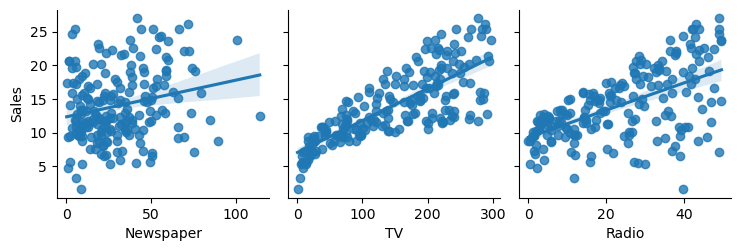

In [10]:
# Scatter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)

sns.pairplot(df, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg')

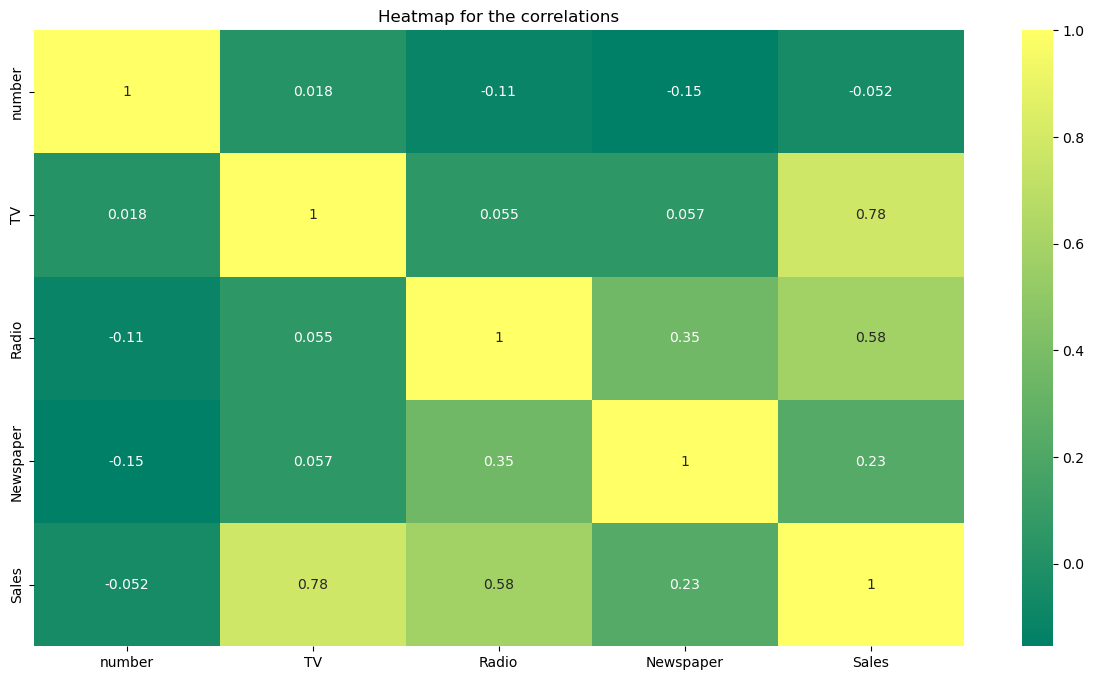

In [12]:
#heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="summer")
plt.title("Heatmap for the correlations")
plt.show()

In [14]:
# Split the data into train and test sets
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [17]:
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2.00
Root Mean Squared Error: 1.41
R-squared: 0.93


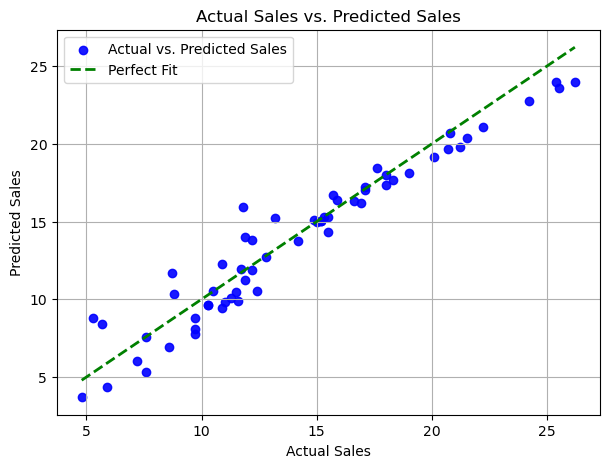

In [22]:
# Visualize the model's predictions
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.9, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [23]:
# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {intercept:.2f}")

Coefficients:
TV: 0.05
Radio: 0.19
Newspaper: -0.00
Intercept: 2.92


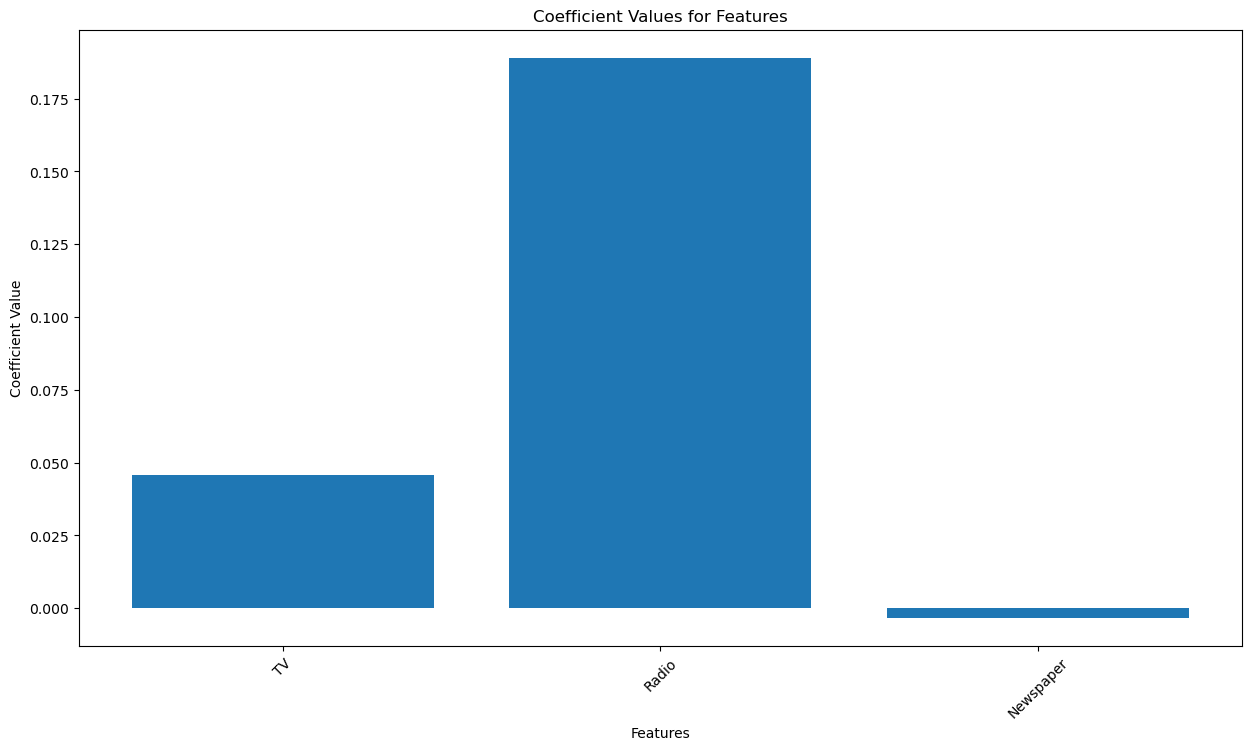

In [25]:
# Coefficient Visualization
plt.figure(figsize=(15,8))
plt.bar(X.columns, coefficients)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Values for Features")
plt.xticks(rotation=45)
plt.show()

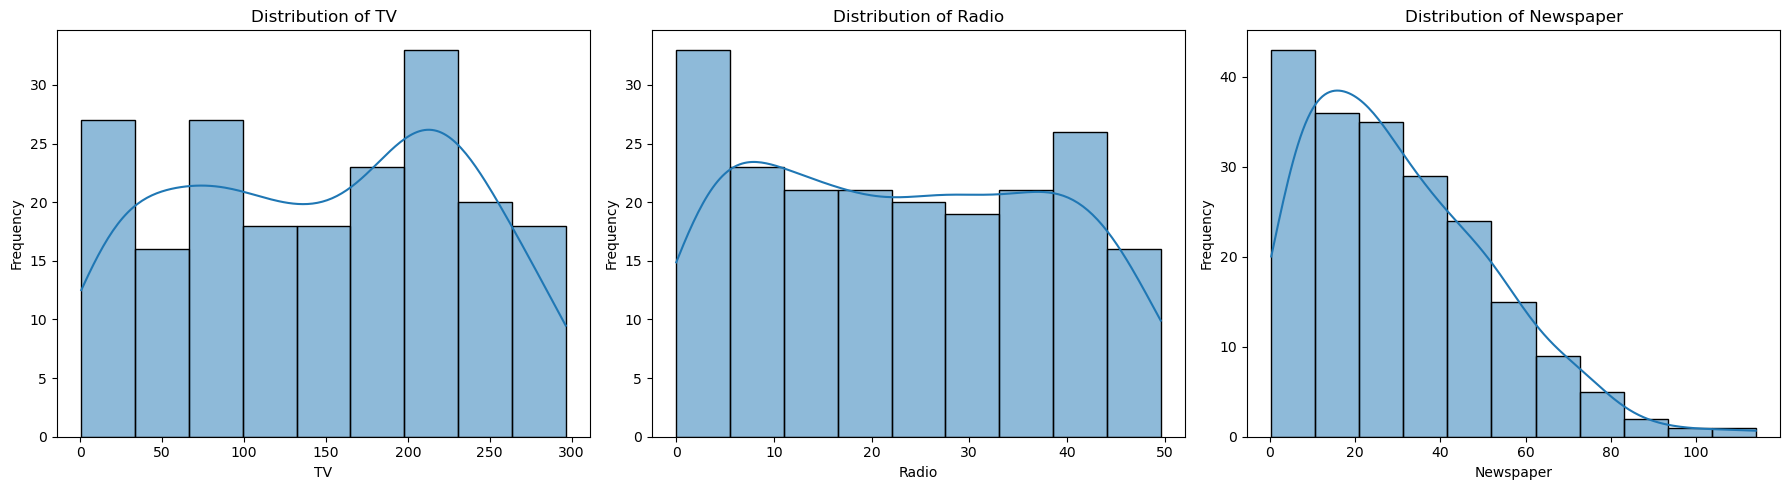

In [27]:
# Feature Distribution Plots
plt.figure(figsize=(18, 5))
for i, feature in enumerate(X.columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [28]:
# Sample new data with the same feature columns as the original dataset
new_df = pd.DataFrame({
    'TV': [200, 150, 300],
    'Radio': [20, 10, 30],
    'Newspaper': [10, 5, 15]
})

new_predictions = model.predict(new_df[['TV', 'Radio', 'Newspaper']])

# Display the predictions for the new data
print("Predictions for New Data:")
print(new_predictions)

Predictions for New Data:
[15.81057277 11.65108245 22.25549012]
